In [2]:
import json

import numpy as np
from sklearn.ensemble import RandomForestClassifier

from config import ARMSTRADER
from util.parse import generate_dictionaries, generate_id_dict

In [3]:
armstrader = ARMSTRADER()
with open(armstrader.PARSED_MODELS_PATH, 'r') as file:
    armstrader_models = json.load(file)

models = armstrader_models
triples = []
for model in models[:]:
    for triple in model:
        triples.append(tuple(triple))

classes, predicates = generate_dictionaries(triples)
classes_mapping = generate_id_dict(classes)
predicates_mapping = generate_id_dict(predicates)


In [4]:
from preprocess.modify_relations import get_relation_counts

get_relation_counts(triples)

[(('http://schema.org/Offer',
   'http://schema.org/name',
   'http://www.w3.org/2001/XMLSchema#string'),
  18330),
 (('http://schema.org/Offer',
   'http://schema.org/price',
   'http://www.w3.org/2001/XMLSchema#string'),
  16230),
 (('http://schema.org/CreativeWork',
   'http://schema.org/name',
   'http://www.w3.org/2001/XMLSchema#string'),
  12255),
 (('http://schema.org/Offer',
   'http://schema.org/availableAtOrFrom',
   'http://schema.org/Place'),
  11253),
 (('http://schema.org/Offer',
   'http://schema.org/description',
   'http://www.w3.org/2001/XMLSchema#string'),
  11190),
 (('http://schema.org/CreativeWork',
   'http://schema.org/copyrightYear',
   'http://www.w3.org/2001/XMLSchema#string'),
  10845),
 (('http://schema.org/Offer',
   'http://schema.org/mainEntityOfPage',
   'http://schema.org/CreativeWork'),
  10353),
 (('http://schema.org/Offer',
   'http://schema.org/seller',
   'http://schema.dig.isi.edu/ontology/PersonOrOrganization'),
  8616),
 (('http://schema.org/Of

In [6]:


#test_triples = random.sample(triples, floor(len(triples) / 10))
#test_triples = [triple for triple in test_triples if triple[0] == 'http://schema.org/Offer' and triple[2] == str(XSD.string)]

In [7]:
n_jobs = -1
ranges = [3]

In [8]:
from util.utilities import prepare_data

name_weights = [0.01,0.2,0.4,0.6,0.8,1.0]
price_weights = [0.01,0.2,0.4,0.6,0.8,1.0]
predictions = []
for name_weight in name_weights:
    triple_weights = {
        ('http://schema.org/Offer', 'http://schema.org/name', 'http://www.w3.org/2001/XMLSchema#string'): name_weight
    }
    template = armstrader_models
    X,y = prepare_data(template,multiply=3, shuffle=True, triple_weights=triple_weights, c_map=classes_mapping, p_map=predicates_mapping, verbose=True)
    rfc = RandomForestClassifier()
    rfc_model = rfc.fit(X,y)
    test_tuple = [classes_mapping['http://schema.org/Offer'], classes_mapping['http://www.w3.org/2001/XMLSchema#string']]
    prediction = rfc_model.predict_proba([test_tuple])
    prediction = rfc_model.classes_[np.argsort(prediction)[:, ::-1]]
    predictions.append({
        'name_weight': name_weight,
        'prediction': prediction
    })


2022-05-15 19:47:05,081 [INFO] - PRE 1 triples
[('http://schema.org/Offer', 'http://schema.org/name', 'http://www.w3.org/2001/XMLSchema#string'), 54990]
2022-05-15 19:47:05,313 [INFO] - POST 0 triples

2022-05-15 19:47:14,562 [INFO] - PRE 1 triples
[('http://schema.org/Offer', 'http://schema.org/name', 'http://www.w3.org/2001/XMLSchema#string'), 54990]
2022-05-15 19:47:14,812 [INFO] - POST 1 triples
[('http://schema.org/Offer', 'http://schema.org/name', 'http://www.w3.org/2001/XMLSchema#string'), 10987]
2022-05-15 19:47:24,007 [INFO] - PRE 1 triples
[('http://schema.org/Offer', 'http://schema.org/name', 'http://www.w3.org/2001/XMLSchema#string'), 54990]
2022-05-15 19:47:24,264 [INFO] - POST 1 triples
[('http://schema.org/Offer', 'http://schema.org/name', 'http://www.w3.org/2001/XMLSchema#string'), 21761]
2022-05-15 19:47:34,179 [INFO] - PRE 1 triples
[('http://schema.org/Offer', 'http://schema.org/name', 'http://www.w3.org/2001/XMLSchema#string'), 54990]
2022-05-15 19:47:34,445 [INFO] 

In [9]:
name_positions = []
for prediction in predictions:
    # print(prediction)
    pred_id = predicates_mapping['http://schema.org/name']
    result = prediction['prediction']
    name_weight = prediction['name_weight']
    position=np.where(result[0] == pred_id)
    name_positions.append(position[0][0] + 1)
    # print(f'Weight {name_weight} -> Position of "http://schema.org/name"({pred_id}): {position[0]+1}')

In [10]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_theme(style="whitegrid")
data = { 'percentage': name_weights,
         'rank': name_positions
         }

In [11]:
#lineplot = sns.lineplot(data=data, x='percentage', y='rank')
#lineplot.axes.set(title="Rank of http://schema.org/name")
#plt.savefig("figures/name_rank.svg", dpi=600, format="svg")
#plt.show()

Price rank manipulation

In [12]:
weights = [0.01,0.2,0.4,0.6,0.8,1.0]
predictions = []
for weight in weights:
    triple_weights = {
        ('http://schema.org/Offer', 'http://schema.org/name', 'http://www.w3.org/2001/XMLSchema#string'): 1.0,
        ('http://schema.org/Offer', 'http://schema.org/price', 'http://www.w3.org/2001/XMLSchema#string'): weight,
    }
    template = armstrader_models
    X,y = prepare_data(template,multiply=3, shuffle=True, triple_weights=triple_weights, c_map=classes_mapping, p_map=predicates_mapping, verbose=True)
    rfc = RandomForestClassifier()
    rfc_model = rfc.fit(X,y)
    test_tuple = [classes_mapping['http://schema.org/Offer'], classes_mapping['http://www.w3.org/2001/XMLSchema#string']]
    prediction = rfc_model.predict_proba([test_tuple])
    prediction = rfc_model.classes_[np.argsort(prediction)[:, ::-1]]
    predictions.append({
        'price_weight': weight,
        'prediction': prediction
    })
price_positions = []
for prediction in predictions:
    # print(prediction)
    pred_id = predicates_mapping['http://schema.org/price']
    result = prediction['prediction']
    weight = prediction['price_weight']
    position=np.where(result[0] == pred_id)
    price_positions.append(position[0][0] + 1)
    # print(f'Weight {weight} -> Position of "http://schema.org/price"({pred_id}): {position[0]+1}')

In [13]:
telephone_weights = [0.01,0.2,0.4,0.6,0.8,1.0]
predictions = []
for weight in telephone_weights:
    triple_weights = {
        ('http://schema.dig.isi.edu/ontology/PersonOrOrganization',   'http://schema.org/telephone',   'http://www.w3.org/2001/XMLSchema#string'):weight
    }
    template = armstrader_models
    X,y = prepare_data(template,multiply=3, shuffle=True, triple_weights=triple_weights, c_map=classes_mapping, p_map=predicates_mapping, verbose=True)
    rfc = RandomForestClassifier()
    rfc_model = rfc.fit(X,y)
    test_tuple = [classes_mapping['http://schema.dig.isi.edu/ontology/PersonOrOrganization'], classes_mapping['http://www.w3.org/2001/XMLSchema#string']]
    prediction = rfc_model.predict_proba([test_tuple])
    prediction = rfc_model.classes_[np.argsort(prediction)[:, ::-1]]
    predictions.append({
        'weight': weight,
        'prediction': prediction
    })

In [14]:
telephone_positions = []
for prediction in predictions:
    # print(prediction)
    pred_id = predicates_mapping['http://schema.org/telephone']
    result = prediction['prediction'][0]
    weight = prediction['weight']
    position=np.where(result == pred_id)
    if not position[0]:
        telephone_positions.append(len(predicates_mapping))
    else:
        telephone_positions.append(position[0][0] + 1)

In [15]:
import pandas as pd
data = { 'percentage': weights,
         'rank :price': price_positions,
         'rank :name': name_positions,
         'rank :telephone': telephone_positions
         }
df = pd.DataFrame(data)
df = df.set_index('percentage')
df

,rank :price,rank :name,rank :telephone
percentage,,,
0.0,26,28,9
0.2,5,5,3
0.4,4,4,3
0.6,3,3,3
0.8,2,2,2
1.0,2,1,2


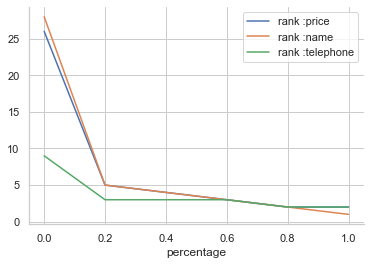

In [16]:
lineplot = sns.lineplot(data=df, dashes=False)
# lineplot.axes.set(title="Rank of http://schema.org/price")
sns.despine()
plt.savefig("figures/modified_relation_ranks.pdf", dpi=600, format="pdf")
plt.show()